In [1]:
# Required imports
import pandas as pd
#import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
healthcare_csv = pd.read_csv('Resources/watson_healthcare_modified.csv')

In [4]:
healthcare_csv

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [6]:
healthcare_csv.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
healthcare_csv['EmployeeID'].unique()

array([1313919, 1200302, 1060315, ..., 1812428, 1812429, 1152329],
      dtype=int64)

In [72]:
## Since the Attrition column is composed of the values "Yes" or "No," in order to perform calculations, we need to assign the value
## "Yes" to the integer 1 and the value "No" to the integer 0.

data_binary = healthcare_csv.copy()
data_binary['Attrition'] = data_binary['Attrition'].map({'Yes': 1, 'No': 0})
data_binary

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


Text(0, 0.5, 'Percent that left')

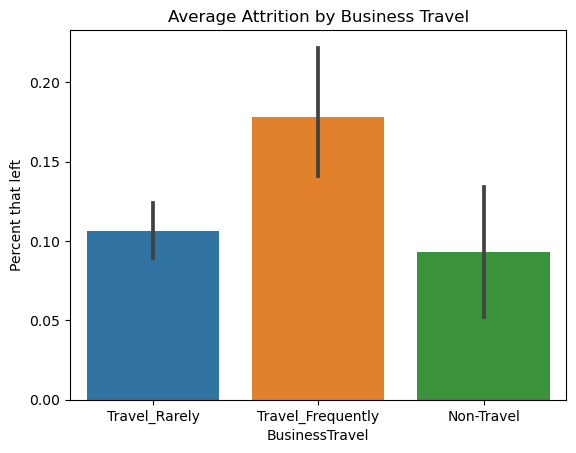

In [21]:
sns.barplot(data_binary, x='BusinessTravel', y='Attrition')
plt.title('Average Attrition by Business Travel')
plt.ylabel('Percent that left')

Text(0, 0.5, 'Percent that left')

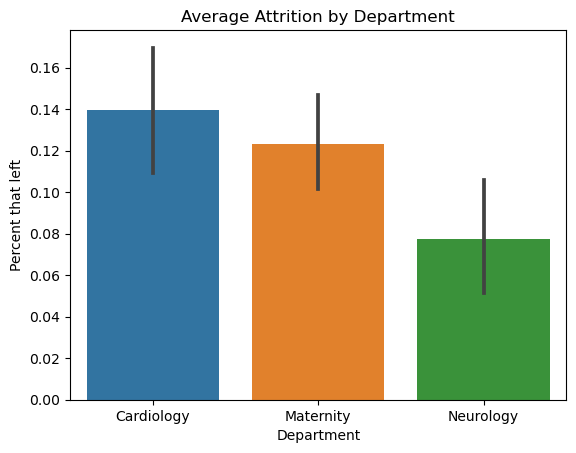

In [22]:
sns.barplot(data_binary, x='Department', y='Attrition')
plt.title('Average Attrition by Department')
plt.ylabel('Percent that left')

Text(0, 0.5, 'Percent that left')

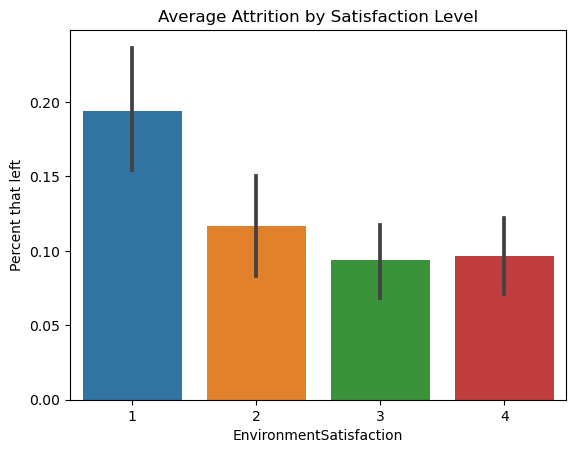

In [23]:
sns.barplot(data_binary, x='EnvironmentSatisfaction', y='Attrition')
plt.title('Average Attrition by Satisfaction Level')
plt.ylabel('Percent that left')

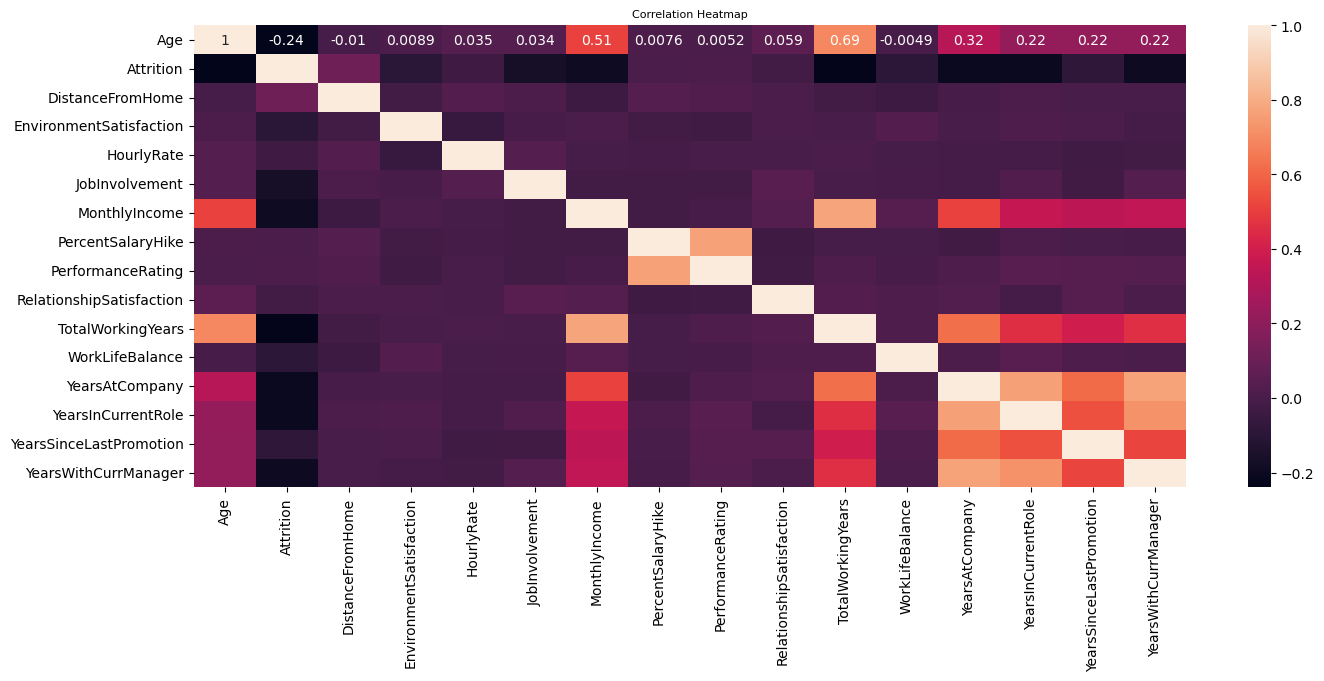

In [25]:
## Below are all the correlations between variables that are continuous against the Attrition variable.

data_binary_filtered = data_binary[['Age', 'Attrition', 'DistanceFromHome',
                                             'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                                             'MonthlyIncome','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                                               'TotalWorkingYears', 'WorkLifeBalance',
                                             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                                               'YearsWithCurrManager']]
correlations = data_binary_filtered.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlations, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=6);

In [26]:
 ## To double check the above results, we performed a few individual point biserial correlations, which is a special case of
 ## the Pearson Coefficient. This is able to  measure the correlation between a binary variable and a continuous variable.
 ## As it turned out, we received the same results as the above heatmap, so we can use it.

 ## Here, the correlation between 'DistanceFromHome' and 'Attrition' is 0.11. This result is statistically significant since the p-value
 ## is less than  0.05.

from scipy import stats
b = data_binary['DistanceFromHome']
a = data_binary['Attrition']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.10558011137359281, pvalue=1.4828040878620907e-05)

In [27]:
## Here, the correlation between 'Age' and 'Attrition' is -0.24. This result is statistically significant since the p-value
## is less than  0.05.

from scipy import stats
b = data_binary['Age']
a = data_binary['Attrition']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=-0.23998378812994633, pvalue=2.20598604651515e-23)

In [28]:
## Here, the correlation between 'EnvironmentSatisfaction' and 'Attrition' is -0.10. This result is statistically significant since the p-value
 ## is less than  0.05.

from scipy import stats
b = data_binary['EnvironmentSatisfaction']
a = data_binary['Attrition']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=-0.10127754577915644, pvalue=3.270133084794789e-05)

## Data Cleaning

In [20]:
# Display the number of null values in each column
null_counts = healthcare_csv.isnull().sum()
print("Null values in each column:\n", null_counts)

# Display rows with null values
rows_with_nulls = healthcare_csv[healthcare_csv.isnull().any(axis=1)]
print("Rows with null values:\n", rows_with_nulls)

Null values in each column:
 EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurr

In [30]:
# Check for duplicate rows.
duplicates = healthcare_csv.duplicated()
num_duplicates = duplicates.sum()
print(f"duplicate rows: {num_duplicates}")

duplicate rows: 0


In [73]:
# Convert non-numerical features to numerical values using Scaling.
# check which columns need to be convereted
object_cols = data_binary.select_dtypes(include=['object']).columns
print(object_cols)

#  Use get dummies on all object columns
businesstravel_dummy = pd.get_dummies(data_binary['BusinessTravel'])
# businesstravel_dummy
dept_dummy = pd.get_dummies(data_binary['Department'])
education_dummy = pd.get_dummies(data_binary['EducationField'])
gender_dummy = pd.get_dummies(data_binary['Gender'])
jobrole_dummy = pd.get_dummies(data_binary['JobRole'])
martial_dummy = pd.get_dummies(data_binary['MaritalStatus'])
over18_dummy = pd.get_dummies(data_binary['Over18'])
overtime_dummy = pd.get_dummies(data_binary['OverTime'])


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [74]:
# Concat dummy columns into original df
data_binary = pd.concat([data_binary,dept_dummy,education_dummy,gender_dummy,jobrole_dummy,martial_dummy,over18_dummy,overtime_dummy], axis=1)
data_binary.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,Administrative,Nurse,Other,Therapist,Divorced,Married,Single,Y,No,Yes
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,False,True,False,False,False,False,True,True,False,True
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,False,False,True,False,False,True,False,True,True,False
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,False,True,False,False,False,False,True,True,False,True
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,False,False,True,False,False,True,False,True,False,True
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,False,True,False,False,False,True,False,True,True,False


In [76]:
# Convert categorical data to numeric with `pd.get_dummies`
data_binary = pd.get_dummies(data_binary,dtype=float)
data_binary.head()

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1313919,41,0,1102,1,2,1,2,94,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1200302,49,0,279,8,1,1,3,61,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1060315,37,1,1373,2,2,1,4,92,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1272912,33,0,1392,3,4,1,4,56,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1414939,27,0,591,2,1,1,1,40,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
# Scale the current df data_binary

In [ ]:
# Split the data into training and test sets.

In [ ]:
# Choose which model we want to use, maybe log reg?

In [ ]:
# Evaluate the model using the test set and accuracy + precision metrics

In [ ]:
# Save the model as a file for use (can use “joblib” or something)

In [ ]:
# The End